### Problem statement

An area of an interconnected power system has two units operating on economic dispatch. The variable operating costs are given by :

$C_{1}$ = 10 * $P_{1}$ + (8 * $10^{-3}$ * $P_{1}^{2}$) \\$ / hr

$C_{2}$ = 8 * $P_{2}$ + (9 * $10^{-3}$ * $P_{2}^{2}$) \\$ / hr

where $P_{1}$ and $P_{2}$ are in MW. Determin the power output of each unit, the incremental operating costs, and the total operating cost $C_{T}$ that minimizes $C_{T}$ as the total load demand $P_{T}$ varies from 500 to 1500 MW. Generating unit inequality constraints and transmission losses are neglected.

## Calculating economic dispatch solution neglecting generator limits and line losses

### Using numpy and pandas and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, diff, Eq, solve


In [2]:
# Adding coefficients for cost functions:

# cost function format = a * P + b * P^2
# for unit 1
aP1 = 10 # $/MWh
bP1 = 8 * math.pow(10,-3) # $ / (Mw^2 * h)

# for unit 2
aP2 = 8 # $/MWh
bP2 = 9 * math.pow(10,-3) # $ / (Mw^2 * h)

# defining total power limits
PT_LL = 500 # lower limit
PT_UL = 1500 # upper limit

In [3]:
#creating a range of power values over which to calculate the cost function of the generators
P_values = np.linspace(0,PT_UL, 150) 

In [4]:
# define a function to model the cost function of the generators. 
# a and b are coefficients of the cost function input P ( generator input power)
def costFunction(pT, a, b):
    cost = (a*pT) + (b*(pT**2))
    return cost

In [5]:
genCost_C1 = costFunction(P_values, aP1, bP1)


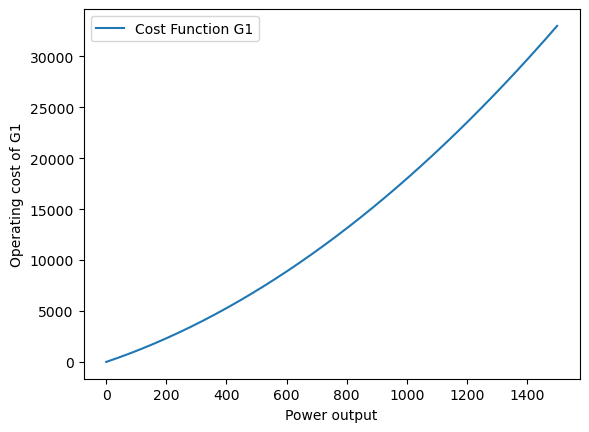

In [6]:
# Plotting Unit 1 cost function
plt.plot(P_values, genCost_C1, label = "Cost Function G1")
plt.legend()
plt.xlabel('Power output')
plt.ylabel('Operating cost of G1')
plt.show()

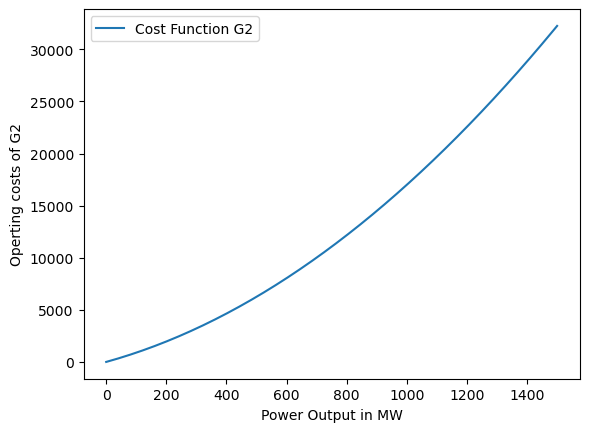

In [7]:
genCost_C2 = costFunction(P_values, aP2, bP2)
plt.plot(P_values, genCost_C2, label = 'Cost Function G2')
plt.xlabel('Power Output in MW')
plt.ylabel('Operting costs of G2')
plt.legend()
plt.show()

#### Calculating the incremental cost function

We do this by taking the derivative of genCost wrt P

In [8]:
# calculate incremental operating costs dC / dP by using np.gradient
incrementalCost1 = np.gradient(genCost_C1, P_values) 
incrementalCost2 = np.gradient(genCost_C2, P_values)

## Calculating individual functions using Numpy

In [9]:
# Calculate different values from P_Total based on the equation
def calFromPt(pT, a, b):
    quantity = (a * pT + b)
    return quantity

# calculate cost functions from P
# define a function to model the cost function of the generators. 
# a and b are coefficients of the cost function input P ( generator input power)
def costFunction(pT, a, b):
    cost = (a*pT) + (b*(pT**2))
    return cost

# creating a cost function that does the same thing as above except the value are stored as a list.
# Its being used below. You'll see how. Patience!
def costFunction1(list1):
    cost = (list1[1]*list1[0]) + (list1[2]*(list1[0]**2))
    return cost

pTotal = np.linspace(PT_LL, PT_UL, ((PT_UL - PT_LL) // 100)+1) # define range of P total from 500MW to 1500MW
print('P Total = ', pTotal)

# calculate P1  = 0.5294* P_T -58.82 MW
P1 = calFromPt(pTotal, 0.5294, -58.82)
print('P1 =', np.around(P1))

# calculate P2 = P_T - P1
P2 = pTotal - P1
print('P2 = ', np.around(P2))

# calculating incremental cost function dC1 / dP1 = dc2 / dP2
dC1_dP1 = calFromPt(pTotal, 8.4704 * math.pow(10,-3), 9.0589)
print(' Incremental cost function dC1 / dP1 = ', dC1_dP1)



#  caclulating cost functions of P1 -> C1 and P2-> C2
C1 = costFunction(P1, aP1, bP1)
C2 = costFunction(P2, aP2, bP2)

# Calculating total minimum cost for varying total power : C_T
C_T = C1 + C2

# calculating cost functin for individual units and then returning the total cost function through a function.
# the function below aims at doing the same thing the above lines of code do

costDictionary = {'C1' : [P1, aP1, bP1], 'C2': [P2, aP2, bP2]}

def calcTotCost(costDict):
    unitCosts = []
    for key, value in costDict.items():
        cost_i = costFunction1(value)
        unitCosts.append(cost_i)
        
    totCost = sum(unitCosts)
    return totCost
    



print('Total minimum cost = ', np.around(C_T))

econDisp = ['PT(MW)', 'P1(MW)', 'P2(MW)', 'dC1 / dP1 ($ / MWh)', 'CTotal ($ / hr)']
columns = [pTotal, P1, P2, dC1_dP1, C_T]

def createDF(columnHeaders, columnsList):
    finalDict = {}
    
    for index, c in enumerate(columnsList):
        finalDict[columnHeaders[index]] = c
    
    finalDF = pd.DataFrame(finalDict)
    return finalDF

econDictCase1 = createDF(econDisp, columns)
econDictCase1

    

P Total =  [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500.]
P1 = [206. 259. 312. 365. 418. 471. 524. 576. 629. 682. 735.]
P2 =  [294. 341. 388. 435. 482. 529. 576. 624. 671. 718. 765.]
 Incremental cost function dC1 / dP1 =  [13.2941  14.14114 14.98818 15.83522 16.68226 17.5293  18.37634 19.22338
 20.07042 20.91746 21.7645 ]
Total minimum cost =  [ 5529.  6901.  8358.  9899. 11525. 13235. 15031. 16911. 18875. 20925.
 23059.]


,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
0,500.0,205.88,294.12,13.29410,5529.411765
1,600.0,258.82,341.18,14.14114,6901.176471
2,700.0,311.76,388.24,14.98818,8357.647059
3,800.0,364.70,435.30,15.83522,9898.823530
4,900.0,417.64,482.36,16.68226,11524.705883
5,1000.0,470.58,529.42,17.52930,13235.294119
6,1100.0,523.52,576.48,18.37634,15030.588237
7,1200.0,576.46,623.54,19.22338,16910.588237
8,1300.0,629.40,670.60,20.07042,18875.294120
9,1400.0,682.34,717.66,20.91746,20924.705885


## Adding generator limits

 Inequality constraints for generators:
 
 100 <= $P_{1}$ <= 600 MW
 
 400 <= $P_{2}$ <= 1000 MW

Since we are concerned with total power varying from 500 MW to 1500 MW we expect Gen 2 to hit its lower limit first. So we will focus on that limit. As we proceed to 1500 MW we expect G1 to hit its upper limt. 

Looking at the data frame above - P2 varies from 294 MW to 765 MW as the total power varies from 500 to 1500 MW. 

For  economic discpatch to be met within the generator limits, the P2 will be held at 400 MW even for loads lower than 400 MW. Calulate the incremental operating cost dC / dp for the generator at the limiting value and equate the incremental costs of other units to that value for economic dispatch criterion to be met. 

So, if one of the generators is operating at its limit, keep the output at that limit and then calculate the dC / dP or incremental operating cost at that power output. For the set total power, this specific generator will then produce the limit value and the remaining will come from other units such that their dC / dP is equal to the dC / dP of the limiting generator. 

Using the above example as a reference: 
We know that P2 has a lower limit of 400 MW. Therefore, at lighter loads where P2 could go below 400MW we still keep the operating limit of P2 at 400MW. We then calculate the incremental operating cost dC / dP for P2 at its limiting value of 400MW.

In [10]:
# defining generator limits in MW
P1_LL = 100 # Gen 1 lower limit
P1_UL = 600 # Gen 1 Upper limit

P2_LL = 400 # Gen 2 lower limit
P2_UL = 1000 # Gen 2 Upper limit

## Economic dispatch solution for lower generation limit of P2 = 400 MW

In [11]:
# Calculating dC / dP at P2 = 400MW
# we know that dC2 / dP2 = 8 + 18*10^(-3) * P2

dC2_dP2_400 = calFromPt(P2_LL, 2 * bP2, aP2) 
print(f'Incremental operating cost for P2 at {P2_LL} Mw = {round(dC2_dP2_400, 2)} $/MWh')

Incremental operating cost for P2 at 400 Mw = 15.2 $/MWh


Per the economic dispatch criterion operating costs are minimum if all the units operate at equal incremental operating costs. Therefore dC / dP for other generators ( generator 1 in this case) will be  = dC2/dP2 at 400MW = 15.2 \\$/MWh

dC1 / dP1 = 15.2 \\$/ MWh

10 + 16 * 10^(-3) * P1 = 15.2 $ / MWh

P1 = (15.2 - 10) / (16 * 10^(-3))

In [12]:
P1_P2_400 = (dC2_dP2_400 - aP1) / (2*bP1)
print(f'Output power of Gen 1 when Gen 2 is operating at its limit of {P2_LL} Mw is = {round(P1_P2_400)} MW')

Output power of Gen 1 when Gen 2 is operating at its limit of 400 Mw is = 325 MW


In [13]:
# Calculating total power when Gen 2 is operating at its lower limit
PT_2LL = int(P1_P2_400 + P2_LL)
print(f'Total power at incremental operating cost of {round(dC2_dP2_400,2)} $ / MWh ={PT_2LL} MW')

Total power at incremental operating cost of 15.2 $ / MWh =725 MW


Therefore, for total power less than 725 MW would imply that P1 is less than 325 MW. When that happens the incremental operating coost of G1 is less than 15.2 \\$ / MWh. And hence the incremental operating cost is determined by unit 1 alone. This is because, any additional MWh will come from G1 since G2 is at its lower limit. Till such time the incremental operating cost for G1 reaches 15.2 \\$ / MWh G1 will continue to decide the incremental operating cost.

One can argue that we could simply increase the output of G2, however in doing so the economic dispatch criterion wont be met, since that will increase the incremental operating cost to more than 15.2 \\$ / MWh. When you have a low cost option, going for a a higher cost option doesnt make sense. 

In [14]:
# calculating the incremental operating cost for 100 MW of power from G1- the lowest incremental operating cost of the system
calFromPt(100, 2*bP1, aP1) 

11.6

In [15]:
# calculating the first part of the total power matrix - for when P2 = 400 MW
pTotal1 = np.array([i for i in range(PT_LL,PT_2LL, 100) if i < PT_2LL])
pTotal1 = np.append(pTotal1, PT_2LL)
pTotal1

array([500, 600, 700, 725])

In [16]:
# calculating KW values for P1 when P2 = 400 MW  : P1 = PTotal - P2( Lower Limit)
P11 = pTotal1 - P2_LL
P11

array([100, 200, 300, 325])

In [17]:
# Creating corresponding array for P2 at lower limit
P21 = np.array([P2_LL for i in range(np.shape(P11)[0])])
P21

array([400, 400, 400, 400])

In [18]:
# As discussed above when P2 is set at 400 MW and Total power is < 725 MW the incremental cost of the system is then 
# determined by P1 alone. 
# Calculating incremental operating cost based on the equation:
# dC / dP = 10 + 16 * 10^(-3) * P1
dC_dP12 = calFromPt(P11, 2*bP1, aP1)
dC_dP12

array([11.6, 13.2, 14.8, 15.2])

In [19]:
# calculating total cost for Total power up to 725 MW
costDictionary = {'C1' : [P11, aP1, bP1], 'C2': [P21, aP2, bP2]}
totCost1 = calcTotCost(costDictionary)
totCost1

array([5720., 6960., 8360., 8735.])

In [20]:
# creating a data frame for the lower limit of the problem
columns = [pTotal1, P11, P21, dC_dP12, totCost1]
econDictCase2 = createDF(econDisp, columns)
econDictCase2

,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
0,500,100,400,11.6,5720.0
1,600,200,400,13.2,6960.0
2,700,300,400,14.8,8360.0
3,725,325,400,15.2,8735.0


## Economic dispatch solution for higher limit of P1 = 600 MW

As mentioned above as we increase the total power to 1500 MW we hit the upper limit of generator G1. At heavier loads, Unit 1 is now the limiting factor and it will operate at 600 MW. Calculate the incremental operating cost dC1 / dP1 at P1 = 600 MW. As the total power output increases additional load will come from P2 and the incremental operating costs will be determined by P2 since any additional MWh will be coming from P2.

In [21]:
# Calculating dC / dP for P1 at P1 = 600MW
# we know that dC1 / dP1 = 10 + 16*10^(-3) * P1

dC1_dP1_600 = calFromPt(P1_UL, 2 * bP1, aP1) 
print(f'Incremental operating cost for Gen 1 P1 at {P1_UL} Mw = {round(dC1_dP1_600, 2)} $/MWh')

Incremental operating cost for Gen 1 P1 at 600 Mw = 19.6 $/MWh


Per the economic dispatch criterion operating costs are minimum if all the units operate at equal incremental operating costs. Therefore dC / dP for other generators ( generator 2 in this case) will be = dC1/dP1 at 600MW = 15.2 $/MWh

dC2 / dP2 = 19.6 $/ MWh

8 + 18 * 10^(-3) * P2 = 15.2 $ / MWh

P2 = 19.6 - 10) / (18 * 10^(-3))

In [22]:
P2_P1_600 = (dC1_dP1_600 - aP2) / (2*bP2)
print(f'Output power of Gen 2 when Gen 1 is operating at its upper limit of {P1_UL} Mw is = {round(P2_P1_600)} MW')

Output power of Gen 2 when Gen 1 is operating at its upper limit of 600 Mw is = 644 MW


In [23]:
# Calculating total power when Gen 1 is operating at its upper limit
PT_1UL = int(P2_P1_600 + P1_UL)
print(f'Total power at incremental operating cost of {round(dC1_dP1_600, 2)} $ / MWh ={PT_1UL} MW')

Total power at incremental operating cost of 19.6 $ / MWh =1244 MW


Therefore, for total power greater than 1244 MW would imply that P2 is greater than 624 MW. When that happens the incremental operating costt of G2 is greter than 19.6 \\$ / MWh. And hence the incremental operating cost is determined by unit 2 alone. This is because, any additional MWh will come from G2 since G1 is at its upper limit. As soon as the incremental operating cost for G2 goes above 19.6 \\$ / MWh, G2 will continue to decide the incremental operating cost.



In [24]:
# calculating the incremental operating cost for (1500 - 600) MW of power from G2- 
#the highest incremental operating cost of the system
calFromPt((1500 - 600), 2*bP2, aP2) 

24.200000000000003

In [25]:
# calculating the upper part of the total power matrix - for when P1 = 600 MW
pTotal2 = np.array([i for i in range(math.ceil(PT_1UL / 100)*100,PT_UL+1, 100) if i > PT_1UL])
pTotal2 = np.insert(pTotal2, 0, PT_1UL)
pTotal2

array([1244, 1300, 1400, 1500])

In [26]:
# calculating KW values for P2 when P1 = 600 MW  : P2 = PTotal - P1( Uower Limit)
P21 = pTotal2 - P1_UL
P21

array([644, 700, 800, 900])

In [27]:
# Creating corresponding array for P1 at upper limit
P11 = np.array([P1_UL for i in range(np.shape(P21)[0])])
P11

array([600, 600, 600, 600])

In [28]:
# As discussed above when P1 reaches 600 MW and Total power is > 1244 MW the incremental cost of the system is then 
# determined by P2 alone. 
# Calculating incremental operating cost based on the equation:
# dC / dP = 8 + 18 * 10^(-3) * P2
dC_dP21 = calFromPt(P21, 2*bP2, aP2)
dC_dP21

array([19.592, 20.6  , 22.4  , 24.2  ])

In [29]:
# calculating total cost for Total power from 1244 MW and above
costDictionary = {'C1' : [P11, aP1, bP1], 'C2': [P21, aP2, bP2]}
totCost2 = calcTotCost(costDictionary)
totCost2

array([17764.624, 18890.   , 21040.   , 23370.   ])

In [30]:
# creating a data frame for the lower limit of the problem
columns = [pTotal2, P11, P21, dC_dP21, totCost2]
econDictCase3 = createDF(econDisp, columns)
econDictCase3

,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
0,1244,600,644,19.592,17764.624
1,1300,600,700,20.600,18890.000
2,1400,600,800,22.400,21040.000
3,1500,600,900,24.200,23370.000


For total power between 725 MW and 1244 MW neither unit has hit any limit and the economic dispatch solution is the same as we we solved for the solution neglecting generator limits.

Displaying the original full data frame from above:


In [31]:
econDictCase1

,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
0,500.0,205.88,294.12,13.29410,5529.411765
1,600.0,258.82,341.18,14.14114,6901.176471
2,700.0,311.76,388.24,14.98818,8357.647059
3,800.0,364.70,435.30,15.83522,9898.823530
4,900.0,417.64,482.36,16.68226,11524.705883
5,1000.0,470.58,529.42,17.52930,13235.294119
6,1100.0,523.52,576.48,18.37634,15030.588237
7,1200.0,576.46,623.54,19.22338,16910.588237
8,1300.0,629.40,670.60,20.07042,18875.294120
9,1400.0,682.34,717.66,20.91746,20924.705885


In [32]:
# slicing out the data frame that lies between 725 MW < PT < 1244 MW
econDictMid = econDictCase1.loc[(econDictCase1['PT(MW)'] > PT_2LL) & (econDictCase1['PT(MW)'] < PT_1UL)]
econDictMid

,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
3,800.0,364.70,435.30,15.83522,9898.823530
4,900.0,417.64,482.36,16.68226,11524.705883
5,1000.0,470.58,529.42,17.52930,13235.294119
6,1100.0,523.52,576.48,18.37634,15030.588237
7,1200.0,576.46,623.54,19.22338,16910.588237


## Creating a final economic dispatch solution based on generator limits

In [33]:
frames = [econDictCase2, econDictMid, econDictCase3]
economicDispatchFinal = pd.concat(frames)
economicDispatchFinal.reset_index(inplace = True, drop = True)
economicDispatchFinal

,PT(MW),P1(MW),P2(MW),dC1 / dP1 ($ / MWh),CTotal ($ / hr)
0,500.0,100.00,400.00,11.60000,5720.000000
1,600.0,200.00,400.00,13.20000,6960.000000
2,700.0,300.00,400.00,14.80000,8360.000000
3,725.0,325.00,400.00,15.20000,8735.000000
4,800.0,364.70,435.30,15.83522,9898.823530
5,900.0,417.64,482.36,16.68226,11524.705883
6,1000.0,470.58,529.42,17.52930,13235.294119
7,1100.0,523.52,576.48,18.37634,15030.588237
8,1200.0,576.46,623.54,19.22338,16910.588237
9,1244.0,600.00,644.00,19.59200,17764.624000


## Economic dispatch adding transmission line losses

Although one unit may be very efficient with low operating cost, it may be lcated far away from the load center. The transmission losses associated with this unit may be so high that the economic dispatch solution requires the unit to decrease its output while other units with higher incremental operting costs but lower transmission losses increase their outputs.

The incremental operating cost now becomes 

$$\lambda = \frac{dC_{i}}{ dP_{i}} * (L_{i}) = \frac{dC_{i}}{ dP_{i}} * \frac{1}{1-\frac{\partial P_{L}}{\partial P_{i}}}$$

For i = 1, 2, 3, .... N

Here $L_{i}$ is the penaly factor. Each unit that is not at a limit value operates such that its incremental oeprating cost $dC_{i} / dP_{i}$ multiplied by the penalty factor $L_{i}$ is the same.

The solution considering line losses uses the sympy module in pandas

# Defining the problem

An area of an interconnected power system has two units operating on economic dispatch. The variable operating costs are given by :

$C_{1}$ = 10 * $P_{1}$ + (8 * $10^{-3}$ * $P_{1}^{2}$) \\$ / hr

$C_{2}$ = 8 * $P_{2}$ + (9 * $10^{-3}$ * $P_{2}^{2}$) \\$ / hr

where $P_{1}$ and $P_{2}$ are in MW.

For this system the transmission losses are given by: 

$P_{L} = (1.5*10^{-4} * P_{1}^{2}) + (2 * 10 ^{-5} * P_{1} * P_{2}) + (3*10^{-5} * P_{2}^{2})$

Determin the total output of each unit, the total tranmission losses , the total load demand, and total operating costs $C_{T}$ when $\lambda$ = 16 \$ / MWh

This problem is solved using the SymPy module in Python. 

Reference link on creating equations and solving them: 

https://stackoverflow.com/questions/30791504/python-partial-derivatives-easy 

https://problemsolvingwithpython.com/10-Symbolic-Math/10.07-Solving-Two-Equations-for-Two-Unknowns/

https://docs.sympy.org/latest/modules/solvers/solvers.html

https://docs.sympy.org/latest/guides/solving/solve-equation-algebraically.html

https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve






In [39]:
# defining the transmission loss function of the power system

p1, p2 = symbols('p1 p2', real = True)
pL = (1.5 * math.pow(10,-4) * p1**2) + (2* math.pow(10,-5)*p1*p2) + (3* math.pow(10,-5)* p2**2) # Line losses


In [44]:
def generateCostFunction(a, b, symbol):
    genCostFunc = (a * symbol) + (b * symbol**2)
    return genCostFunc

c1 = generateCostFunction(aP1, bP1, p1)
c2 = generateCostFunction(aP2, bP2, p2)

In [55]:
solve(c1, p1) # solves the cost function for P1by equating the equation C1  = 0

[-1250.00000000000, 0.0]

Based on the effect of transmission losses as mentioned above : 
$$\lambda = \frac{dC_{1}}{ dP_{1}} * \frac{1}{1-\frac{\partial P_{L}}{\partial P_{1}}} = \frac{dC_{2}}{ dP_{2}} * \frac{1}{1-\frac{\partial P_{L}}{\partial P_{2}}}$$


In [58]:
# writing a function that calculates lambda
# Note : We  are given the lambda or final incrementa operating costs after considering losses = 16 $ / MWh
def calculateLambda(costFunc, XmssnLoss, symbol):
    dC_dP = diff(costFunc, symbol)
    lossFuncPartial = diff(XmssnLoss, symbol)
    lambdaVal = dC_dP * (1/ (1 - lossFuncPartial)) - 16
    return lambdaVal



In [59]:
lambda_p1 = calculateLambda(c1, pL, p1) # creating the eqquation for Unit 1
lambda_p2 = calculateLambda(c2, pL, p2) # Creating the equatin for unit 2
print(lambda_p1)
print(lambda_p2)

(0.016*p1 + 10)/(-0.0003*p1 - 2.0e-5*p2 + 1) - 16
(0.018*p2 + 8)/(-2.0e-5*p1 - 6.0e-5*p2 + 1) - 16


In [72]:
# solvng the the two equations above to get the output power of P1 and P2 
solutionsDict = solve((lambda_p1, lambda_p2),(p1,p2))
print(f'Solving the above set of equations give P1 = {round(solutionsDict[p1],2)} MW, P2 = {round(solutionsDict[p2],2)} MW')

Solving the above set of equations give P1 = 282.04 MW, P2 = 417.18 MW


In [74]:
# calculating loss value for values of P1 and P2
lossVal = pL.subs({p1:solutionsDict[p1],p2: solutionsDict[p2]})
print(f'Total transmission losses for P1 = {round(solutionsDict[p1],2)} MW, P2 = {round(solutionsDict[p2],2)} are {round(lossVal,2)} MW')

Total transmission losses for P1 = 282.04 MW, P2 = 417.18 are 19.51 MW


In [78]:
# Calculating total power for the given solutions: 
pTotal = solutionsDict[p1] + solutionsDict[p2] - lossVal
print(f'Total power is after losses is  {round(pTotal,2)} MW')

Total power is after losses is  679.72 MW


### Calculating total cost

In [81]:
cT = c1 + c2
totalOperatingCost = cT.subs({p1 : solutionsDict[p1], p2 : solutionsDict[p2]})
print(f'The total operating cost is {round(totalOperatingCost,2)} $ / hr')

The total operating cost is 8360.62 $ / hr


Note that when the transmission losses are included , $\lambda$ is no longer the incremental operating costs of the are. Instead $\lambda$ is the unit incremental operating cost $dC_{i} / dP_{i}$ multiplied by the unit penalty factor $L_{i}$